In [1]:
import requests
from pprint import pprint
from PIL import Image
import os
import shutil
import cv2
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
temp_image_path = 'd:/dane/test_out/test.tif'

In [25]:
def process_image(input_path, blur_param):
    img = cv2.imread(input_path)
    
    img_output = cv2.medianBlur(img, blur_param)
    
    cv2.imwrite(temp_image_path, img_output) 
    
    with open(temp_image_path, 'rb') as f:
        r = requests.post('http://127.0.0.1:5000/api/v1/segmentation/opticdisk', files = {'file': ('test.tif', f, 'image/tiff', {'Expires': '0'})})
        print(r)    
        if r.status_code != 200:
            raise ValueError("Unexpected result")
            
        outputFileName = r.content
        return outputFileName

In [26]:
def read_gif_by_cv2(pathIn):
    cap = cv2.VideoCapture(pathIn)
    ret, image = cap.read()
    cap.release()
    return image

In [27]:
def load_from_pickle(pathIn):
    ar_file = open(pathIn, "rb")
    res = pickle.load(ar_file)
    ar_file.close()
    return res

In [28]:
def dump_to_pickle(obj, target_path):
    target_file = open(target_path, 'wb')
    pickle.dump(obj, target_file)
    target_file.close()

In [29]:
def compare_images_cv2_fast(cv2image1, cv2image2):
    
    rows1,cols1,_ = cv2image1.shape
    rows2,cols2,_ = cv2image2.shape
    
    if rows1 != rows2 or cols1 != cols2:
        print(rows1)
        print(rows2)
        print(cols1)
        print(cols2)
        raise ValueError("Images have different size")
        
    cv2image1int = cv2image1.astype(int)
    cv2image2int = cv2image2.astype(int)
    
    all_count = cv2image1int.shape[0] * cv2image1int.shape[1]
    diff = (cv2image1int - cv2image2int)
    diff = np.abs(diff)
    diff_sum = diff.sum() / (255 * cv2image1int.shape[2])
    equal_count = (np.sign((exp_img.astype(int) - img_out.astype(int))) == 0).astype(int).sum() / cv2image1int.shape[2]
    
    return (equal_count, diff_sum, all_count, equal_count + diff_sum)
    

In [30]:
input_dir = 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/'
expected_result_dir = 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/'

In [9]:
output_dir = 'd:/Dane/test_out/'

In [31]:
files = os.listdir(input_dir)
res_list = []
for file_name in files:
    expected_result_file = file_name
    full_file_name = input_dir + file_name
    expected_result_file = expected_result_file.replace('_training.tif', '_manual1.gif')
    full_expected_result_file = expected_result_dir + expected_result_file
    for blur_param in [5, 9, 13, 17, 21, 25]:
        output_file = process_image(full_file_name, blur_param)
        res_list.append((full_file_name, output_file, full_expected_result_file, blur_param))

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200

In [35]:
#res_map = load_from_pickle('d:/res_histo_map.pickle')
dump_to_pickle(res_list, 'd:/res_map_with_blur_range.pickle')

In [37]:
res_values = res_list

In [39]:
all_results = {}
images_cache = {}
all_count = 0

le = len(all_results)

for im in res_values:
    _, pr, ex, blur_param = im
    
    if not blur_param in all_results:
        all_results[blur_param] = []
    
    ex = ex.replace('_training.tif', '_manual1.gif')
    pr = pr.decode("utf-8")
    #print(ex)
    #print(pr)

    if ex in images_cache:
        exp_img = images_cache[ex]
    else:
        exp_img = read_gif_by_cv2(ex)
        images_cache[ex] = exp_img

    img = cv2.imread(pr)
    ret_val, img_out = cv2.threshold(img, 98, 255, cv2.THRESH_BINARY)

    comparison_result = compare_images_cv2_fast(exp_img, img_out)
    all_results[blur_param].append(comparison_result)
    all_count = all_count + 1
    if all_count % 100 == 0:
        print('all count ' + str(all_count) + " " + str(le))

all count 100
all count 200
all count 300
all count 400
all count 500
all count 600
all count 700
all count 800
all count 900
all count 1000
all count 1100
all count 1200
all count 1300
all count 1400
all count 1500
all count 1600
all count 1700
all count 1800
all count 1900
all count 2000
all count 2100
all count 2200
all count 2300
all count 2400


In [40]:
dump_to_pickle(all_results, 'd:/all_median_blur_treshold_results.pickle')

In [45]:
all_ratios = []
ixs = []

for k in all_results.keys():
    res = all_results[k]
    correct_sum = 0
    all_sum = 0
    ixs.append(k)
    for t in res:
        correct_sum = t[0]
        all_sum = t[2]
    ratio = correct_sum * 1.0 / all_sum
    all_ratios.append(ratio)

In [46]:
ixs

[5, 9, 13, 17, 21, 25]

In [42]:
all_results

{5: [(329319.0, 641.0, 329960, 329960.0),
  (329103.0, 857.0, 329960, 329960.0),
  (329185.0, 775.0, 329960, 329960.0),
  (329010.0, 950.0, 329960, 329960.0),
  (317654.0, 12306.0, 329960, 329960.0),
  (327061.0, 2899.0, 329960, 329960.0),
  (329184.0, 776.0, 329960, 329960.0),
  (329549.0, 411.0, 329960, 329960.0),
  (329316.0, 644.0, 329960, 329960.0),
  (329348.0, 612.0, 329960, 329960.0),
  (329394.0, 566.0, 329960, 329960.0),
  (329165.0, 795.0, 329960, 329960.0),
  (328653.0, 1307.0, 329960, 329960.0),
  (329251.0, 709.0, 329960, 329960.0),
  (329559.0, 401.0, 329960, 329960.0),
  (321834.0, 8126.0, 329960, 329960.0),
  (328389.0, 1571.0, 329960, 329960.0),
  (329463.0, 497.0, 329960, 329960.0),
  (329300.0, 660.0, 329960, 329960.0),
  (329513.0, 447.0, 329960, 329960.0),
  (329207.0, 753.0, 329960, 329960.0),
  (328650.0, 1310.0, 329960, 329960.0),
  (329353.0, 607.0, 329960, 329960.0),
  (329467.0, 493.0, 329960, 329960.0),
  (329474.0, 486.0, 329960, 329960.0),
  (329506.0, 45

In [47]:
all_ratios

[0.998499818159777,
 0.9984816341374713,
 0.9984695114559341,
 0.9982361498363438,
 0.9981088616802036,
 0.998154321735968]

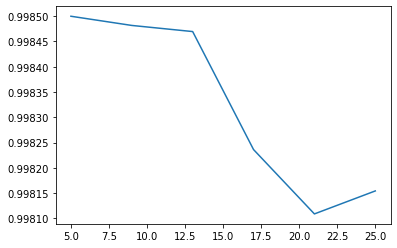

In [48]:
plt.plot(ixs, all_ratios)

In [49]:
np.argmax(all_ratios)

0

In [50]:
all_ratios[np.argmax(all_ratios)]

0.998499818159777